2.1 신경망과의 첫 만남

In [ ]:
# 케라스에서 mnist 데이터셋 적재하기
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 훈련 세트
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# 테스트 세트
test_images.shape



(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# 신경망 구조
from keras import models
from keras import layers

network = models.Sequential()
# print(network)
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
print(network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))))
print(network.add(layers.Dense(10, activation='softmax')))

None
None


신경망 층인 Dense 층 2개가 연속, 두번째층은 10개의 확률 점수가 들어 있는 배열(모두 더하면 1)을 반환하는 소프트맥스층이다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스중 하나에 속할 확률

신경망이 훈련준비를 마치기 위해 컴파일 단계에 3가지가 더 필요

1. 손실함수(loss function): 훈련데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와줌
2. 옵티마이저(optimizer): 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘
3. 훈련과 테스트 과정을 모니터링할 지표: 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려

In [ ]:
# 컴파일 단계
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']))

None


훈련 시작전 테이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1사이로 스케일을 조정
그렇기에 앞서 훈련이미지는 [0, 255] 사이의 값인 uint8 타입의 (60000, 28, 28) 크기를 가진 배열로 저장되어 있다. 이 데이터를 0과 1사이의 값을 가지는 float32타입의 (60000, 28, 28) 크기인 배열로 바꿈

In [ ]:
# 이미지 데이터 준비하기
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [ ]:
# 레이블 준비하기
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 1.2698 - accuracy: 0.5056
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1858 - accuracy: 0.9545
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0895 - accuracy: 0.9766
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0600 - accuracy: 0.9834
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0460 - accuracy: 0.9872


위에 있는 정보는 훈련데이터에 대한 네트워크의 손실과 정확도이다.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1108 - accuracy: 0.9750


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.9750000238418579


테스트 정확도는 97.8% 정도로 나왔는데 훈현세트의 정확도 보다는 약간 낮습니다. 훈련 정확도와 테스트 정확도 사이의 차이는 과대적합(overfitting) 때문이다. 이는 머신 러닝 모델이 훈현 데이터보다 새로운 데이터에서 성능이 낮아지는 경향을 말한다.

2.2 신경망을 위한 데이터 표현

2.2.1 스칼라(0D 텐서)

하나의 숫자만 담고 있는 텐서를 스칼라(scalar)(또는 스칼라 텐서, 0차원텐서, 0D 텐서)라고 부른다. float32나ㅣ float64 타입의 숫자가 스칼라 텐서. 스칼라아 텐서의 축 개수는 0(ndim == 0). 텐서의 축 개수를 랭크라고도 부름

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

2.2.2 벡터(1D 텐서)

숫자의 배열을 벡터(vector)또는 1D 텐서라고 부른다. 딱 하나의 축을 가진다.

In [ ]:
x= np.array([12, 2, 5, 6, 16])
x

array([12,  2,  5,  6, 16])

In [ ]:
x.ndim

1

이 벡터는 5개의 원소를 가지고 있어서 5차원 벡터라 부른다. 5D 벡터와 5D 텐서를 혼동하면 안된다. 5D 벡터는 하나의 축을 따라 5개의 차원을 가진것이고 5D 텐서는 5개의 축을 가진것이다.(

2.2.3 행렬(2D 텐서)

벡터의 배열이 행렬(matrix) 또는 2D 텐서. 행렬에는 2개의 축이 있다(행과 열)

In [ ]:
x = np.array([[5, 12, 4, 34, 6],
              [1, 23, 6, 45, 2],
              [7, 65, 9,12, 5]])
x

array([[ 5, 12,  4, 34,  6],
       [ 1, 23,  6, 45,  2],
       [ 7, 65,  9, 12,  5]])

In [ ]:
x.ndim

2

첫 번째 축에 놓여있는 원소를 행, 두번째 축에 놓여있는 원소를 열.

x의 첫번째 행은 [5, 12, 4, 34, 6]

첫번째 열은 [5, 1, 7]

2.2.4 3D 텐서와 고차원 텐서

3D 텐서: 행렬들을 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체 형태로 해석됨

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 35, 1]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 35,  1]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [ ]:
x.ndim

3

3D 텐서들을 하나의 배열로 합치면 4D 텐서를 만드는 식으로 이어짐. 딥러닝에서는 보통 0D에서 4D 까지의 텐서를 다룸. 동영상 데이터의 경우 5D 텐서까지도 가기도함

2.2.5 핵심 속성

텐서는 3개의 핵심 속성으로 정의됨

1. 축의 개수(랭크) : 3D 텐서에는 3개의 축이 있고 2D 텐서(행렬)에는 2개의 축이 있다. ndim 속성에 저장되어 있음

2. 크기(shape) : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플임. 위에서 했던 행렬의 크기는 (3, 5)이고 3D 텐서는 (3, 3, 5)이다.
 백터의 크기는 (5,)처럼 1개의 원소로 이루어진 튜플이다. 배열 스칼라는 ()처럼 크기가 없다

3. 데이터 타입(numpy에서는 dtype에 저장됨) : 텐서에 포함된 데이터의 타입

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# train_images 배열의 ndim속성으로 축의 개수 확인
print(train_images.ndim)

3


In [ ]:
# 배열의 크기
print(train_images.shape)

(60000, 28, 28)


In [ ]:
# 데이터 타입확인
print(train_images.dtype)

uint8


위의 배열은 8비트 정수형 3D 텐서이다. 더 정확하게는 28 * 28 크기의 정수 행렬 6만개가 있는 배열. 각 행렬은 하나의 흑백 이미지고, 행렬의 각 원소는 0에서 255 사의 값을 가진다.

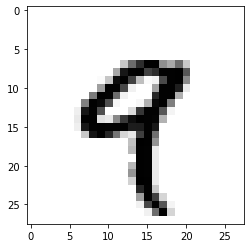

In [ ]:
# 다섯번째 이미지 출력하기
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

2.2.6 넘파이로 텐서 조작하기

train_images[i] 처럼 특정 원소를 선택하는 것을 슬라이싱

In [ ]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [ ]:
my_slice = train_images[10:100, :, :]  # 이전 예와 동일
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]  # 이전 예와 동일
my_slice.shape

(90, 28, 28)

In [ ]:
# 이미지의 오른쪽 아래 14*14픽셀을 선택
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [ ]:
# 정중앙에 위치한 14*14 픽셀을 선택
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

2.2.7 배치 데이터

mnist 숫자 데이터에서 크기가 128인 배치하나는 다음과 같다

In [ ]:
batch = train_images[:128]
batch

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# 그다음 배치는 다음과 같다
batch = train_images[128:256]
batch

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# n번째 배치

batch = train_images[128*n:128*(n+1)]
batch

이런 배치데이터를 다룰때는 첫번째 축을 배치축(batch axis) 또는 배치 차원(batch dimension)이라 부른다

2.2.8 텐서의 실제 사례

- 벡터 데이터: (samples, features) 크기의 2D 텐서
- 시계열 데이터 또는 시퀀스(sequence) 데이터: (samples, timesteps, features) 크기의 3D 텐서
- 이미지: (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
- 동영상: (samples, frames, height, width, channels) 또는 ((samples, frames, channels, height, width) 크기의 5D 텐서

2.3 신경망의 톱니바퀴: 텐서 연산

2.3.1 원소별 연산

relu 함수와 덧셈은 원소별 연산(element-wise operation)이다.

In [ ]:
# relu 연산 relu 연산
def naive_relu(x):
  assert len(x.shape) == 2 # x는 2D 넘파이 배열

  x = x.copy # 입력텐서 자체를 바꾸지 않도록 복사
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

In [ ]:
# 덧셈도 동일
def naive_add(x, y):
  assert len(x.shape) == 2 # x와 y는 2D 넘파이 배열
  assert x.shape == y.shape

  x = x.copy # 입력텐서 자체를 바꾸지 않도록 복사
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

같은 원리로 원소별 곱셈, 뺄셈도 할 수 있다.

import numpy as np

z = x+y # 원소별 덧셈

z = np.maximun(z, 0.) # 원소별 렐루 함수


2.3.2 브로드캐스팅

브로드캐스팅은 2단계로 이루어진다.

1. 큰 텐서의 ndim에 맞도록 작은 텐서에 (브로드캐스팅 축이라고 부르는) 축이 추가된다.
2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복된다.


In [ ]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2 # x는 2D 넘파이 배열입니다.
  assert len(y.shape) == 1 # y는 너마이 백터입니다.
  assert x.shape[1] == y.shape[0]

  x = x.copy() # 입력 텐서 자체를 바꾸지 않도록 복사
  for i in range(x.shape[0]):
    for j in range(x.shpae[1]):
      x[i, j] += y[j]
  return x

(a, b, ... , n, n+1, ....m) 크기의 텐서와 (n, n+1, .... m) 크기의 텐서 사이에 브로드캐스팅으로 원소별 연산을 적용할수 있다. 이때 브로드캐스팅은 a부터 n-1 까자의 축에 자동으로 일어난다

In [ ]:
# 다음은 크기가 다른 두 텐서에 브로드캐스팅으로 원소별 maximum연상을 적용하는 예
import numpy as np

x = np.random.random((64, 3, 32, 10)) # x는 (64, 3, 32, 10) 크기의 랜덤 텐서
y = np.random.random((32, 10)) # y는 (32, 10) 크기의 랜덤 텐서

z = np.maximum(x, y) # 출력 z의 크기는 x와 동일하게 (64, 3, 32, 10)이다

2.3.3 텐서 점곱

텐서 곱셈이라고도 부르는 (원소별 곱셈과 혼동x) 점곱 연산은 가장 널리 사용되고 유용한 텐서 연산이다. 원소별 연산과 반대로 입력 텐서의 원소들을 결합시킨다.

넘파이, 케라스, 씨아노, 텐서플로에서 원소별 곱셈은 * 연산자를 사용한다. 텐서플로에서는 dot 연산자가 다르지만 넘파이와 케라스는 점곱 연산에 보편적인 dot 연산자를 사용한다.

In [ ]:
# 2개의 벡터 x와 y의 점곱은 다음과 같이 계산한다
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1  # x와 y는 넘파이 벡터입니다
  assert x.shape[0] == y.shape[0]

  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

두 벡터의 점곱은 스칼라가 되므로 원소 개수가 같은 벡터끼리 점곱이 가능

행렬 x와 벡터 y사이에서도 점곱이 가능하다

In [ ]:
import numpy as np
def naive_matrix_vector_dot(x, y):
  assert len(x.shape) == 2 # x는 넘파이 행렬
  assert len(y.shape) == 1 # y는 넘파이 벡터
  assert x.shape[1] == y.shape[0] # x의 두번째 차원이 y의 첫번째 차원과 같아야한다

  z = np.zeros(x.shape[0]) # 이연산은 x의 행과 같은 크기의 0이 채워진 벡터를 만듬
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
  return z

두 텐서 중 하나라도 ndim이 1보다 크면 dot연산에 교환 법칙이 성립되지 않는다. dot(x,y)와 dot(y,x)가 같지 않다.

물론 점곱은 임의의 축 개수를 가진 텐서에 일반화된다. 가장 일반적인 용도는 두 행렬 간의 점곱일 것이다. x.shape[1] == y.shape[0] 일 때 두 행렬 x와 y의 점곱(dot(x,y))이 성립된다. x의 열과, y의 행 사이 벡터 점곱으로 인해 (x.shape[0], y.shape[1]) 크기의 행렬이 된다

In [ ]:
def naive_matrix_dot(x, y):
  assert len(x.shape) == 2 # x는 넘파이 행렬
  assert len(y.shape) == 2 # y는 넘파이 행렬
  assert x.shape[1] == y.shape[0] # x의 두번째 차원이 y의 첫번째 차원과 같아야한다

  z = np.zeros(x.shape[0], y.shape[1]) # 이연산은 0이 채워진 특정 크기의 벡터를 만듬
  for i in range(x.shape[0]): # x의 행을 반복
    for j in range(x.shape[1]): # y의 열을 반복
      row_x = x[i,:]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)
  return z

2.3.4 텐서 크기 변환

꼭 알아두어야 할 세번째 텐서 연산은 텐서 크기 변환(tensor reshaping)이다. 첫번째 신경망 예제의 Dense 층에서는 사용되지 않지만 신경망에 주입할 숫자 데이터를 전처리할 때 사용한다.

train_images = train_images.reshape((60000, 28 * 28))

텐서의 크기를 변환한다는 것은 특정 크기에 맞게 열과 행을 재배열한다는 뜻이다. 당연히 크기가 변환된 텐서는 원래 텐서와 원소 개수가 동일하다

In [ ]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(x.shape)

(3, 2)


In [ ]:
x = x.reshape((6, 1))
print(x)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


In [ ]:
x = x.reshape((2, 3))
print(x)

[[0. 1. 2.]
 [3. 4. 5.]]


자주 사용하는 특별한 크기 변환은 전치(transposition)이다. 행렬의 전치는 행과 열을 바꾸는 것을 의미한다

In [ ]:
x = np.zeros((300, 20)) # 모두 0으로 채워진(300, 20) 크기의 행렬을 만듬

In [ ]:
x = np.transpose(x)
print(x.shape)

(20, 300)


2.4 신경망의 엔진: 그래디언트 기반 최적화

output = relu(dot(w, input) +b)

이 식에서 텐서 w와 b는 층의 속성처럼 볼 수 있다. 가중치(weight) 또는 훈련되는 파라미터(trainable parameter)라고 부른다.(각각 커널(kernel)과 편향(bias)이라고 부르기도 한다.) 이런 가중치에는 훈련데이터를 신경망에 노출시켜서 학슴된 정보가 담겨 있다. 

초기에는 가중치 행렬이 작은 나수로 채워져있다.(무작위 초기화(random initialization)단계라고 부른다) 물론 w와 b가 난수일 때 relu(dot(w, input) + b)가 유용한 어떤 표현을 만들것이라고 기대할 수는 없다. 즉 의미 없는 표현이 만들어진다. 하지만 이는 시작 단계일 뿐입니다. 그다음에는 피드백 신호에 기초하여 가중치가 점진적으로 조정될 것이다. 이런 점진적인 조정 또는 훈련이 머신 러닝 학습의 핵심이다. 

훈련은 다음과 같은 훈련 반복 루프(training loop) 안에서 일어난다. 필요한 만큼 반복 루프 안에서 이런 단계가 반복된다.

1. 훈련 샘플 x와 이에 상응하는 타깃 y의 배치를 추출한다.
2. x를 사용하여 네트워크를 실행하고(정방향 패스(forward pass) 단계), 예측 y_pred를 구한다.
3. y_pred 와 y의 차이를 측정하여 이배치에 대한 네트워크의 손실을 계산한다.
4. 배치에 대한 손실이 조금 감소되도록 네트워크의 모든 가중치를 업데이트한다.


2.4.1 변화율이란?

실수 x를 새로운 실수 y로 매핑하는 연속적이고 매끄러운 함수 f(X) = y를 생각해보자. 이 함수가 연속적이므로 x를 조금 바꾸면 y사 조금만 변경될 것이다. 이것이 연속성의 개념이다. x를 작은 값 epsilon_x만큼 증가시켰을 때 y가 epsilon_y만큼 바뀐다고 말할 수 있다.

f(x + epsilon_x) = y + epsilon_y

또 이 함수가 매끈하므로 epsion_x가 충분히 작다면 어떤 포인트 p에서 기울기 a의 선형 함수로 f를 긑사할 수 있다. 따라서 epsilon_y는 a*epsilon_x가 된다.

f(x + epsilon_x) = y + a*epsilon_x

이 선형적인 근사는 x가 p에 충분히 가까울 때 유효하다.

이 기울기를 p에서 f의 변화율이라고 한다. 이는 a가 음수일 때 p에서 양수 x만큼 조금 이동하면 f(x)가 감소한다는 것을 의미한다. a가 양수일 때는 음수 x만큼 조금 이동하면 f(x)가 감소된다. a의 절댓값(변화율의 크기)은 이런 증가나 감소가 얼마나 빠르게 일어날지 알려준다.


2.4.2 텐서 연산의 변화율: 그래디언트

그래디언트는 텐서 연산의 변화율이다. 이는 다차원 입력, 즉 텐서를 입력으로 받는 함수에 변화율 개념을 확장시킨 것이다.

입력 벡터 x, 행렬 w, 타깃 y와 손실 함수 loss가 있따고 가정하면 w를 사용하여 타깃의 예측 y_pred를 계산하고 소닛, 즉 타깃 예측 y_pred와 타깃 y 사이의 오차를 계산할 수 있다.

y_pred = dot(w,x)
loss_value = loss(y_pred, y)

입력데이터 x와 y가 고정되어 있담ㄴ 이 함수는 w를 손실 값에 매핑하는 함수로 볼수 있다.

loss_value = f(w)

w의 현재 값을 w0이라고 하면 포인트 w0에서 f의 변화율은 w와 같은 크기의 텐서인 gradient(f)(w0)이다. 이텐서의 각 원소 gradient(f)(w0)[i, j]는 w0[i, j]를 변경했을 때 loss_value가 바뀌는 방향과 크기를 나타낸다. 다시 말해 텐서 gradient(f)(w0)가 w0에서 함수 f(w) = loss_value의 그래디언트이다.

앞서 함수 f(x)의 변화율 하나는 곡선 f의 기울기로 해석할 수 있다는 것을 보았다. 비슷하게 gradient(f)(w0)는 w0에서 f(w)의 기울기를 나타내는 텐서로 해석할수 있다. 

그렇기 떄문에 함수 f(x)에 대해서는 변화율 반대 방향으로 x를 조금 움직이면 f(x)의 값을 감소시킬수 있다.